In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

import matplotlib.pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## **DATASET Fashion MNIST**
[Enlace al dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv)

Fashion MNIST es un conjunto de datos que contiene imágenes de artículos de ropa en escala de grises. Contiene 10000 imagenes para entrenamiento . Cada imagen es de 28 x 28 pixeles. Las imagenes estan en escala de grises, por lo que cada pixel tiene un valor entre 0 y 255.

Las imágenes están aplanadas en una sola fila en los archivos CSV.
Esto significa que cada imagen de 28x28 se convierte en un vector de 784 (28*28) características.

Cada imagen en el dataset tiene una etiqueta que representa la clase de ropa a la que pertenece.
Hay 10 categorías diferentes de ropa, cada una etiquetada con un número entero del 0 al 9.

* 0	T-shirt/top (Camiseta/top)
* 1	Trouser (Pantalón)
* 2	Pullover (Jersey)
* 3	Dress (Vestido)
* 4	Coat (Abrigo)
* 5	Sandal (Sandalia)
* 6	Shirt (Camisa)
* 7	Sneaker (Zapatilla)
* 8	Bag (Bolso)
* 9	Ankle boot (Bota de tobillo)

Primera columna: Contiene la etiqueta (de 0 a 9) que representa la clase de la imagen.

Restantes 784 columnas: Contienen los valores de los píxeles de la imagen aplanada en escala de grises (28x28). Cada valor de píxel es un número entero entre 0 (negro) y 255 (blanco).

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/AI/Dataset/fashion-mnist_test.csv')
print('Dimensiones:', dataframe.shape)
dataframe.sample(n=200)

Dimensiones: (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2373,4,0,0,0,0,0,0,0,0,0,...,0,0,56,86,40,11,0,0,0,0
8377,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6673,4,0,0,0,0,0,0,0,0,0,...,186,141,94,0,131,132,118,0,0,0
4895,2,0,0,0,0,0,0,1,0,0,...,0,0,0,87,119,24,0,0,0,0
914,1,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,6,0,0,0,0,0,0,51,80,0,...,139,142,179,43,0,0,0,0,0,0
4641,4,0,0,0,0,0,0,0,0,1,...,83,9,74,131,135,62,0,0,0,0
5856,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Esta línea usa el método ``.unique()`` de pandas para extraer todos los valores únicos de la columna 'label'.
Almacena estos valores en la variable SizeCar_Var. Almacena estos valores en la variable **label**.

Luego imprime los valores unicos de la columna con el tamanio de la lista

In [ ]:
# Verificar si hay valores nulos en el dataset
def verificar_nulos(dataframe):
    """
    Función para verificar si hay valores nulos en un dataset.

    Parámetros:
    dataframe : pd.DataFrame
        El dataset que se quiere verificar.

    Retorna:
    Un resumen de la cantidad de valores nulos por columna.
    """
    # Verificar los valores nulos
    nulos = dataframe.isnull().sum()

    # Imprimir resumen
    if nulos.sum() == 0:
        print("No hay valores nulos en el dataset.")
    else:
        print("Resumen de valores nulos por columna:")
        print(nulos[nulos > 0])

# Llamar a la función para verificar nulos
verificar_nulos(dataframe)


No hay valores nulos en el dataset.


In [ ]:
label = dataframe['label'].unique() #Obtenemos todos los valores unicos de la columna 'label'

#Mostramos la lista de valores unicos y la cantidad de estos
print(label)
print(len(label))

[0 1 2 3 8 6 5 4 7 9]
10


### Extender el Dataset con Imágenes Rotadas

1. **Separar las etiquetas y las imágenes**
   ```
   python
   labels = dataframe['label']
   images = dataframe.drop('label', axis=1).values  # Obtener solo los valores de los píxeles
   ```
2. **Convertir las iamgenes a un formato 28x28**

Convierto las iamgenes planas que estan en 784 columnas a un formato de 28x28 lo que facilita la rotacion de las imagenes.

3. **Creo las imagenes rotadas 90 grados**

Uso una lista de comprensión para rotar cada imagen 90 grados usando ``np.rot90().`` Esta operación rota cada imagen de 28x28 píxeles en sentido antihorario.

4. **Volver a aplanar las imagenes rotadas**

Después de rotar las imágenes, las volvemos a aplanar (convertir a un solo vector de 784 valores).

5. **Crear un nuevo DataFrame con las imagenes rotadas**

Creo un nuevo DataFrame ``df_rotated`` que contiene las iamgenes rotadas y sus respectivas etiquetas. e inserto los labels originales al principio del nuevo dataframe.

6. **Combinar el dataset original con el dataset rotado**

Concateno el dataset original `dataframe` con el dataset de imagenes rotadas `df_rotated` para formar un dataset extendido `dataframe_extended`

7. **Imprimo las dimensiones del dataset**




   


In [ ]:
# Separar las etiquetas y las imágenes
labels = dataframe['label']
images = dataframe.drop('label', axis=1).values  # Obtener solo los valores de los píxeles

# Convertir las imágenes a un formato de 28x28
images_reshaped = images.reshape(-1, 28, 28)

# Crear las imágenes rotadas 90 grados
images_rotated = np.array([np.rot90(img) for img in images_reshaped])

# Volver a aplanar las imágenes rotadas a 784 columnas (28x28)
images_rotated_flat = images_rotated.reshape(-1, 784)

# Crear un nuevo DataFrame con las imágenes rotadas
df_rotated = pd.DataFrame(images_rotated_flat, columns=dataframe.columns[1:])
df_rotated.insert(0, 'label', labels)  # Insertar las etiquetas originales

# Combinar el dataset original con el dataset rotado
dataframe_extended = pd.concat([dataframe, df_rotated], ignore_index=True)

print('Dimensiones extendidas:', dataframe_extended.shape)
dataframe_extended.sample(n=200).head()  # Muestra una muestra de 200 ejemplos para verificación

Dimensiones extendidas: (20000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7507,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,2,50,124,...,54,71,67,61,12,0,2,0,0,0
19778,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14853,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3363,4,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


# Imprimir imagenes originales y rotadas
Visualiza y verifica que las imagenes han sido correctamente rotadas y etiquetadas, comparandolas con las originales

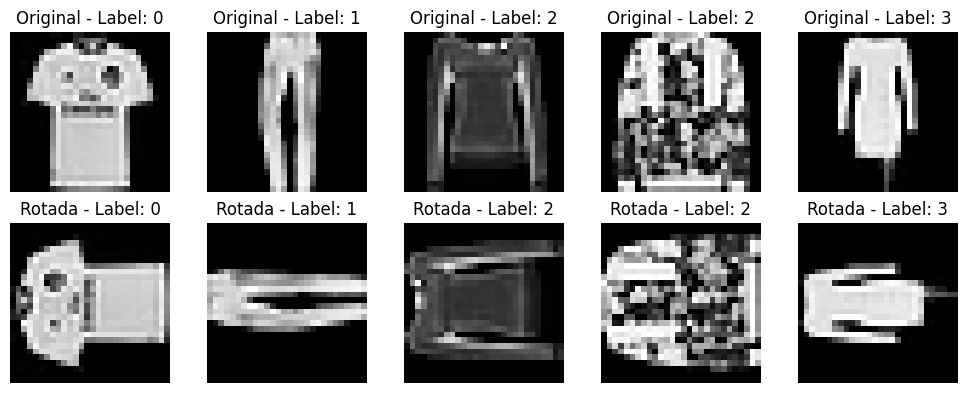

In [ ]:
# Imprimir algunas imágenes originales y rotadas para verificación
num_images = 5  # Número de imágenes a mostrar

plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Mostrar imagen original
    plt.subplot(2, num_images, i + 1)
    plt.imshow(images_reshaped[i], cmap='gray')
    plt.title(f'Original - Label: {labels[i]}')
    plt.axis('off')

    # Mostrar imagen rotada
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(images_rotated[i], cmap='gray')
    plt.title(f'Rotada - Label: {labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Aniadir columnas adicionales al Dataset
1. **Definir un diccionario de mapeo para las clases de Fashion MNIST**
  Asocia cada numero de clase 0 a 9 con una descripcion textual del tipo de prenda

2. **Aniadir columna de color predominante**
  Aniade ``Dominant Color`` al dataset con un color asignado aleatoriamente de la lista de colores para cada imagen.

3. **Aniade columna de Material**
  Basada en el tipo de prenda

4. **Columna de Temporada de uso**
  `Season` que indica la temporada de uso recomendada para cada prenda.

5. **Divido el dataset en dos mitades**
  Calcula el punto medio del dataset, que será utilizado para marcar qué imágenes están rotadas.
6. **Aniadir columna Is Rotated**
  Indica que si una imagen ha sido rotada, al inicio todas son false, la segunda mitad son true.

7. **Verificar la distribucion de la columna Is Rotated**
  Muestra la cantidad de imágenes rotadas y no rotadas para verificar la distribución de los datos.

8. **Mostrar las primeras filas del dataset**

In [ ]:
# Definir un diccionario de mapeo para las clases de Fashion MNIST
clase_descripciones = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Añadir columna de color predominante (asignación aleatoria de ejemplo)
colores = ['Negro', 'Blanco', 'Rojo', 'Azul', 'Verde', 'Amarillo', 'Gris']
dataframe_extended['Dominant Color'] = np.random.choice(colores, len(dataframe_extended))

# Añadir columna de material (asignación coherente con clases)
materiales = {
    0: 'Algodón', 1: 'Algodón', 2: 'Lana', 3: 'Algodón', 4: 'Poliéster', 5: 'Cuero',
    6: 'Algodón', 7: 'Cuero', 8: 'Sintético', 9: 'Cuero'
}
dataframe_extended['Material'] = dataframe_extended['label'].map(materiales)

# Añadir columna de temporada de uso (asignación coherente con clases)
temporadas = {
    0: 'Verano', 1: 'Verano', 2: 'Otoño', 3: 'Primavera', 4: 'Invierno', 5: 'Verano',
    6: 'Otoño', 7: 'Verano', 8: 'Todas', 9: 'Invierno'
}
dataframe_extended['Season'] = dataframe_extended['label'].map(temporadas)

# Dividir el dataset en dos mitades
mitad = len(dataframe_extended) // 2

# Añadir columna de si está rotado o no
dataframe_extended['Is Rotated'] = False  # Inicialmente todas las imágenes no están rotadas

# Para la segunda mitad, establecer como rotadas
dataframe_extended.loc[mitad:, 'Is Rotated'] = True

# Verificar la distribución de la columna 'Is Rotated'
print("\nDistribución de la columna 'Is Rotated':")
print(dataframe_extended['Is Rotated'].value_counts())

# Mostrar las primeras filas del dataset actualizado
print("\nDataset con Columnas Adicionales:")
print(dataframe_extended.head())


Distribución de la columna 'Is Rotated':
Is Rotated
False    10000
True     10000
Name: count, dtype: int64

Dataset con Columnas Adicionales:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  \
0       8  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2      99  ...        63        53        31         0         0         0   
3       0  ...       133       224       222        56         0         0   
4       0

In [ ]:
# Guardar el dataset extendido en un archivo CSV
dataframe_extended.to_csv('/content/drive/MyDrive/AI/Dataset/fashion_mnist_extended.csv', index=False)

print("Dataset guardado exitosamente en 'fashion_mnist_extended.csv'.")

Dataset guardado exitosamente en 'fashion_mnist_extended.csv'.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/Dataset/fashion_mnist_extended.csv')
print('Dimensiones:', df.shape)
df.sample(n=200)

Dimensiones: (20000, 789)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Dominant Color,Material,Season,Is Rotated
14211,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Blanco,Algodón,Otoño,True
3562,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,Rojo,Algodón,Verano,False
3027,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Blanco,Algodón,Otoño,False
642,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Verde,Algodón,Otoño,False
608,0,0,0,0,0,3,1,0,0,0,...,1,0,0,0,0,0,Verde,Algodón,Verano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10825,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Negro,Lana,Otoño,True
15829,9,0,0,0,0,0,73,0,0,0,...,0,0,0,0,0,0,Verde,Cuero,Invierno,True
13300,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Rojo,Cuero,Verano,True
11326,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Verde,Algodón,Primavera,True


## **Normalizar las caracteristicas**

Hay que convertir todos los valores a una misma escala.

**1.** Primero se define la funcion `featureNormalize`, donde toma como argumento `X` que es un array Numpy.

**2.** Se crea una copia de los datos de `X` para evitar modificar los datos originales, esta copia se utilizara para almacenar los datos normalizados.

**3.** Se inicializa `mu` y `sigma` que son arrays que se inicializan en cero, y tendran un tamanio igual al de las caracteristicas X.

* `mu` almacenara la media de cada caracteristicas

* `sigma` almacenara la desviacion estandar de cada caracteristica

**4.** Calcular la Media y la desviacion estandar.
* `np.mean(X, axis = 0)` calcula la media de cada caracteristica (columna) a lo largo de todas las muestras (filas)
* `np.std(X, axis = 0)` calcula la desviacion estandar de cada caracteristica que se almacena en `sigma`
* La normalizacion se basa en restar la media y dividir por la desviacion estandar para cada caracteristica.

**5.** Se aplica la normalizacion:
`X_norm = (X - mu) / sigma`
* Para cada valor en X, se resta la media de su respectiva columna y se divide entre la desviación estándar de esa columna. Este procedimiento ajusta todos los valores de X para que tengan una media de 0 y una desviación estándar de 1.

**6.** Por ultimo se devuelven los resultados. `X_norm` son datos normalizados, `mu` la media de cada caracteristica y `sigma` la desviacion estandar de cada caracteristica.

In [ ]:
def featureNormalize(X):
    """
    Normaliza todas las columnas de X utilizando Z-score.

    Parámetros:
    - X: numpy array, matriz de datos a normalizar.

    Retorna:
    - X_norm: numpy array, matriz de datos normalizados.
    - mu: numpy array, medias de cada columna.
    - sigma: numpy array, desviaciones estándar de cada columna.
    """
    X_norm = X.copy()

    # Calcular la media y desviación estándar de cada columna
    mu = np.mean(X_norm, axis=0)
    sigma = np.std(X_norm, axis=0)

    # Aplicar Z-score a todas las columnas
    X_norm = (X_norm - mu) / sigma

    return X_norm, mu, sigma

# Normalizacion de Datos de Imagenes y Datos categoricos

Este bloque de código realiza la normalización de dos tipos de datos:
1. **Datos de imágenes (píxeles)** que están en un rango de [0, 255].
2. **Datos categóricos** (como el color predominante, material, temporada de uso, y si está rotado) utilizando Z-score.

**1. Separo las columnas de datos de imagenes y las columnas categoricas**
- `pixel_columns` contiene todas las columnas que representan los valores de los píxeles de las imágenes, excluyendo las columnas categóricas.
- `categorical_columns` almacena las columnas que contienen datos categóricos.

**2. Normaliza los datos de las imagenes**
- Los valores de los píxeles de las imágenes se dividen entre 255 para llevarlos a un rango de [0, 1]. Esto es una práctica común en la normalización de imágenes para algoritmos de machine learning.

**3. Convertir columnas categoricas a valores numericos**
- Utiliza `astype('category').cat.codes` para convertir las columnas categóricas en códigos numéricos, lo que facilita la normalización con Z-score.
- La columna 'Is Rotated' se convierte directamente a tipo entero (int), ya que originalmente es booleana (True o False).

**4. Aplica la normalizacion Z-score a las columnas categoricas**
- Extrae los valores de las columnas categóricas y los convierte a un array de Numpy.
- Normaliza las columnas categóricas utilizando la función featureNormalize que aplica el Z-score.

**5. Reemplazar las columnas categóricas normalizadas en el DataFrame original**
- Crea una copia del DataFrame original df para evitar modificarlo directamente.
- Reemplaza las columnas categóricas con sus versiones normalizadas.






In [ ]:
# Separar los datos de imágenes (píxeles) y los datos categóricos
pixel_columns = [col for col in df.columns if col not in ['label', 'Dominant Color', 'Material', 'Season', 'Is Rotated']]
categorical_columns = ['Dominant Color', 'Material', 'Season', 'Is Rotated']

# Normalizar los datos de las imágenes dividiendo entre 255
df[pixel_columns] = df[pixel_columns] / 255.0

# Convertir columnas categóricas a numéricas (si es necesario)
df['Dominant Color'] = df['Dominant Color'].astype('category').cat.codes
df['Material'] = df['Material'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes
df['Is Rotated'] = df['Is Rotated'].astype(int)

# Aplicar la normalización usando Z-score solo a las columnas categóricas
X_categorical = df[categorical_columns].values.astype(np.float64)
X_categorical_normalized, mu, sigma = featureNormalize(X_categorical)

# Reemplazar las columnas categóricas normalizadas en el DataFrame original
df_normalized = df.copy()
df_normalized[categorical_columns] = X_categorical_normalized

# Verificar la normalización
print("Datos normalizados (primeras filas):")
print(df_normalized.head())

Datos normalizados (primeras filas):
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6    pixel7    pixel8  \
0      0     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  0.035294   
1      1     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  0.000000   
2      2     0.0     0.0     0.0     0.0     0.0     0.0  0.054902  0.207843   
3      2     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  0.000000   
4      3     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  0.000000   

     pixel9  ...  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  \
0  0.031373  ...  0.000000  0.000000  0.000000  0.000000       0.0       0.0   
1  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0       0.0   
2  0.388235  ...  0.247059  0.207843  0.121569  0.000000       0.0       0.0   
3  0.000000  ...  0.521569  0.878431  0.870588  0.219608       0.0       0.0   
4  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0       0.0   

 

# Graficas de correlacion
Utilizo el metodo de reduccion de dimensionalidad en la primera grafica, en la segunda utilizo t-SNE para representar visualmente las 10 clases del dataset en dos dimensiones.

- La primera grafica muestra una dispersion amplia de puntos. Ademas de que las clases no estan separadas
- No existen fronteras claras entre las mayoria de las clases



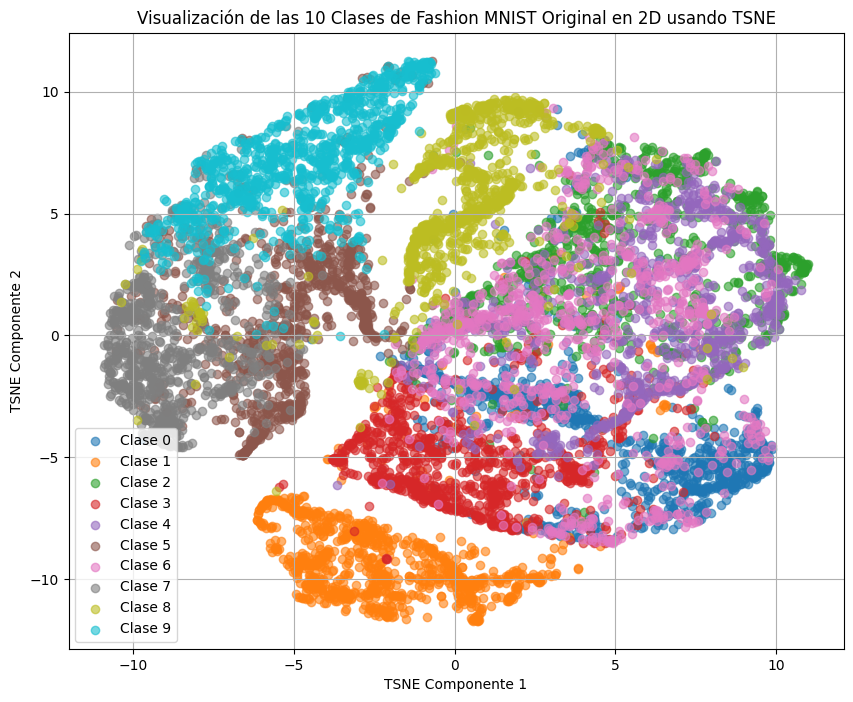

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dataset Original: Asegúrate de que todas las columnas sean numéricas
X_original = dataframe.drop(columns=['label']).values  # Excluir solo la columna 'label' que contiene las clases
y_original = dataframe['label'].values  # Etiquetas de clase

# Aplicar PCA para reducir la dimensionalidad a 2D (Dataset Original)
pca_original = PCA(n_components=2)
X_pca_original = pca_original.fit_transform(X_original)

# Alternativa con TSNE (Dataset Original)
tsne_original = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne_original = tsne_original.fit_transform(X_original)

plt.figure(figsize=(10, 8))
for clase in np.unique(y_original):
    plt.scatter(X_tsne_original[y_original == clase, 0], X_tsne_original[y_original == clase, 1], label=f'Clase {clase}', alpha=0.6)

plt.title('Visualización de las 10 Clases de Fashion MNIST Original en 2D usando TSNE')
plt.xlabel('TSNE Componente 1')
plt.ylabel('TSNE Componente 2')
plt.legend()
plt.grid(True)
plt.show()


# GRAFICAS DE DISPERCION DE CLASES

**Dataset Original**
- En el dataset original, algunas clases como la "Clase 1" (Trouser) y "Clase 7" (Sneaker) están claramente separadas de otras, lo que indica que estos datos son más fáciles de distinguir. Sin embargo, hay un nivel de solapamiento significativo entre otras clases, como "Clase 2" (Pullover), "Clase 3" (Dress), y "Clase 6" (Shirt). Este solapamiento sugiere que estas clases comparten características visuales comunes que dificultan su separación clara en el espacio 2D.
- La distribución es más compacta, con muchos puntos agrupados en regiones centrales. Esto indica que las clases están menos dispersas en el espacio, y algunas áreas del gráfico tienen alta densidad de puntos, lo que significa que hay muchas instancias similares cercanas entre sí.

**Dataset Modificado**
- En el dataset modificado, se nota una mayor separación de las clases en general. Las clases que estaban más solapadas en la primera imagen, como "Clase 2" (Pullover) y "Clase 3" (Dress), parecen estar más definidas y menos mezcladas. Esto puede ser el resultado de la inclusión de nuevas características (como el color predominante, el material y la temporada de uso) que ayudan a diferenciar mejor las clases. Las clases "Clase 1" (Trouser) y "Clase 7" (Sneaker) permanecen bien separadas, lo que refuerza su fácil diferenciación.
- La distribución muestra una mayor dispersión y una estructura más definida de grupos. Las clases están más extendidas en el espacio, y los puntos están más separados, indicando que las nuevas características añadidas (color, material, temporada, y si está rotado) han introducido variabilidad adicional que el algoritmo de TSNE puede usar para separar mejor las instancias de diferentes clases.
- Las características adicionales en el dataset modificado (como el color, material, temporada, y si la imagen está rotada) han proporcionado nueva información que ayuda a diferenciar mejor entre las diferentes clases. Esto ha resultado en una mejor separación de las clases, como se observa en la gráfica modificada.

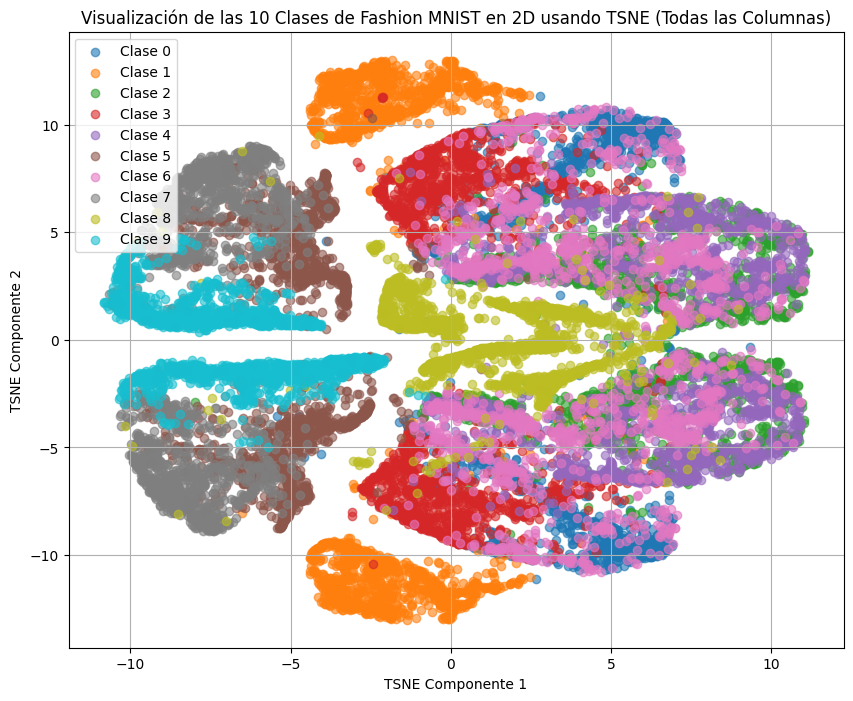

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Asegúrate de que todas las columnas sean numéricas
X = df_normalized.drop(columns=['label']).values  # Excluir solo la columna 'label' que contiene las clases
y = df_normalized['label'].values  # Etiquetas de clase

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Alternativa con TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
for clase in np.unique(y):
    plt.scatter(X_tsne[y == clase, 0], X_tsne[y == clase, 1], label=f'Clase {clase}', alpha=0.6)

plt.title('Visualización de las 10 Clases de Fashion MNIST en 2D usando TSNE (Todas las Columnas)')
plt.xlabel('TSNE Componente 1')
plt.ylabel('TSNE Componente 2')
plt.legend()
plt.grid(True)
plt.show()

# Dividir el dataset
`train_test_split` es una función de scikit-learn que divide un dataset en conjuntos de entrenamiento y prueba de forma aleatoria.

- df_normalized: Este es el dataset normalizado que queremos dividir.
- train_data: Contendrá el 80% de los datos para el entrenamiento del modelo.
- test_data: Contendrá el 20% de los datos para evaluar el modelo.
- test_size=0.2: Indica que el 20% de los datos se asignará al conjunto de prueba.
- random_state=42: Garantiza que la división sea reproducible, ya que establece una semilla para la generación de números aleatorios.




In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_normalized, test_size=0.2, random_state=42)

print("Datos de Entrenamiento Normalizados:")
print(train_data.head())

print("\nDatos de Prueba Normalizados:")
print(test_data.head())


Datos de Entrenamiento Normalizados:
      label  pixel1  pixel2    pixel3    pixel4  pixel5  pixel6    pixel7  \
5894      9     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
3728      7     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
8958      2     0.0     0.0  0.003922  0.007843     0.0     0.0  0.007843   
7671      8     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
5999      1     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

      pixel8  pixel9  ...  pixel779  pixel780  pixel781  pixel782  pixel783  \
5894     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
3728     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
8958     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
7671     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
5999     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   

      pixel784  Dominant 

Convierto los datos de entrenamiento y prueba de pandas DataFrame a arrays de NumPy

# Convertir los datos de entrenamiento y prueba en arrays Numpy

**1. Spearacion de caracteristicas**
- `X_train` contiene las características (píxeles de la imagen y otras columnas añadidas) de los datos de entrenamiento. Se excluye la columna 'label' para obtener solo las características.
- `y_train` contiene las etiquetas de clase correspondientes a cada fila de datos de entrenamiento.
- De forma similar, X_test y y_test se obtienen de los datos de prueba.

**2. Conversion a Numpy arrays**
- Se utiliza `.values.astype(np.float64)` para convertir los datos del DataFrame de pandas a arrays de Numpy con tipo de datos float64. Esto es útil para garantizar que los datos estén en un formato adecuado para la mayoría de los algoritmos de machine learning.


In [ ]:
# Convertir a arrays de Numpy
X_train = train_data.drop(columns=['label']).values.astype(np.float64)
y_train = train_data['label'].values.astype(np.float64)

X_test = test_data.drop(columns=['label']).values.astype(np.float64)
y_test = test_data['label'].values.astype(np.float64)

# Verificar la conversión
print("\nArray de Numpy de Datos de Entrenamiento (X_train):")
print(X_train[:5])  # Mostrar las primeras 5 filas de características de entrenamiento

print("\nArray de Numpy de Etiquetas de Entrenamiento (y_train):")
print(y_train[:5])  # Mostrar las primeras 5 etiquetas de entrenamiento


Array de Numpy de Datos de Entrenamiento (X_train):
[[ 0.          0.          0.         ... -0.15075567 -1.42366426
  -1.        ]
 [ 0.          0.          0.         ... -0.15075567  1.05227358
  -1.        ]
 [ 0.          0.          0.00392157 ...  0.60302269 -0.8046798
  -1.        ]
 [ 0.          0.          0.         ...  2.11057941  0.43328912
  -1.        ]
 [ 0.          0.          0.         ... -0.90453403  1.05227358
  -1.        ]]

Array de Numpy de Etiquetas de Entrenamiento (y_train):
[9. 7. 2. 8. 1.]


### **La función sigmoide**
Se utiliza para "comprimir" cualquier número real a un rango entre 0 y 1, haciendo que sea útil para modelar probabilidades. Dada su forma en "S" o curva logística, la función sigmoide toma valores reales y los transforma en una salida que puede interpretarse como una probabilidad.

In [ ]:
# Función sigmoide
def sigmoid(z):
    #z = np.clip(z, -500, 500)
    #z = np.asarray(z, dtype=np.float64)
      # Convierte z a un array de Numpy de tipo flotante
    return 1 / (1 + np.exp(-z))

### **Función de costo**

***Costo (J):*** Una medida de qué tan bien el modelo actual (definido por theta) se ajusta a los datos. La función de costo ayuda a guiar el entrenamiento del modelo ajustando los valores de theta para minimizar este costo.

***Gradiente (grad):*** El gradiente del costo con respecto a cada parámetro en theta. Esto se utiliza para actualizar los parámetros durante el proceso de optimización (por ejemplo, utilizando el algoritmo de descenso de gradiente).

***Parámetros***

* `theta`: Un array numpy que contiene los parámetros actuales de la regresión logística. Es un vector de tamaño n, donde n es el número de características (incluyendo el término de intercepción o "bias").

* `X`: El conjunto de datos de entrada, una matriz m x n donde m es el número de ejemplos y n es el número de características (incluyendo la intercepción).

* `y`: Las etiquetas o valores de salida esperados. Es un vector de tamaño m, donde cada valor es la etiqueta correspondiente a un ejemplo en X.

* `lambda_`: Parámetro de regularización. Un escalar que controla la magnitud de la penalización por tener pesos grandes, ayudando a prevenir el sobreajuste.

**IMPLEMENTACION DE LA FUNCIÓN**

**1. Inicializacion de Variables Útiles**
* `m`: Número de ejemplos de entrenamiento. Se obtiene del tamaño de y.

**2. Inicializacion de la funcion de Costo y el Gradiente**

* Inicializa el costo J como 0 y el gradiente grad como un vector de ceros del mismo tamaño que theta. Esto es para asegurar que tengan los valores correctos antes de los cálculos.

**3. Calculo de la Hipotesis**

```
h = sigmoid(X.dot(theta.T))
```

* `X.dot(theta.T)`: Calcula el producto punto de la matriz de entrada X con el vector theta. Esto resulta en un vector de tamaño m, donde cada entrada representa el valor lineal predicho para un ejemplo.

* `sigmoid(...)`: Aplica la función sigmoide a cada valor del producto punto para obtener la probabilidad estimada de que la etiqueta sea 1 para cada ejemplo. h es, por lo tanto, un vector de tamaño m con valores entre 0 y 1.

**4. Regularizacion de los parametros**

* `temp`: Crea una copia de theta para usarla en la regularización.
* `temp[0] = 0`: Establece el primer elemento de temp (el término de intercepción o "bias") a 0. Esto se hace porque no se debe regularizar el término de intercepción en la regresión logística.

**5. Calculo del costo regularizado**
* *Primera Parte (`(1 / m) * np.sum(...)`)*
  * Calcula la funcion de costo de la regresion logistica sin regularizacion
  * `-y.dot(np.log(h))`: Calcula el costo cuando la etiqueta y es 1.
  * `(1 - y).dot(np.log(1 - h))`: Calcula el costo cuando la etiqueta y es 0.
  * La suma total representa el costo promedio de todas las predicciones

* *Segunda Parte ((lambda_ / (2 * m)) * np.sum(np.square(temp)))*:
  * Agrega la penalización de regularización al costo.
  * Regulariza todos los elementos de theta excepto el término de intercepción (theta[0]).

**6. Calculo del gradiente regularizado**
* `(1 / m) * (h - y).dot(X)`: Calcula el gradiente de la función de costo sin regularización. Esto es la derivada de la función de costo con respecto a cada parámetro en theta.

* `(lambda_ / m) * temp`: Agrega el término de regularización al gradiente. Recuerda que temp[0] = 0, por lo que el término de intercepción no se regulariza.

**7. Retorno del costo y el gradiente**

In [ ]:
# Función de coste con regularización
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)

    h = sigmoid(X.dot(theta.T))
    #h = np.clip(h, 1e-15, 1 - 1e-15)  # Asegura que los valores de h estén entre (0, 1)

    temp = theta
    temp[0] = 0  # No regularizar el término de sesgo (bias)

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

## Explicación de la Función de Descenso por Gradiente

### Inicialización de Parámetros

- `m = y.shape[0]`: Calcula el número de ejemplos de entrenamiento en el conjunto de datos (`m`). `y` es el vector de etiquetas (valores reales de salida), y su tamaño da el número de ejemplos en el conjunto de datos.
- `theta = theta.copy()`: Realiza una copia de los parámetros iniciales `theta` para evitar modificar el original mientras se ajustan los parámetros durante el proceso de aprendizaje.
- `J_history = []`: Inicia una lista vacía para almacenar el historial de costos a lo largo de las iteraciones del descenso por gradiente.

### Bucle de Iteración del Descenso por Gradiente

- `for i in range(num_iters)`: Ejecuta el bucle de actualización del gradiente por el número de iteraciones especificado (`num_iters`).

### Cálculo de la Hipótesis

- `h = sigmoid(np.dot(X, theta))`: Calcula la hipótesis `h` para la regresión logística. Utiliza la función sigmoide (`sigmoid`) para obtener la probabilidad de que un ejemplo pertenezca a una clase. `np.dot(X, theta)` realiza el producto punto entre el conjunto de características `X` y los parámetros actuales `theta`.

### Cálculo del Gradiente

- `gradient = (alpha / m) * np.dot((h - y), X)`: Calcula el gradiente, que representa la dirección y magnitud del ajuste necesario para minimizar el costo. Aquí:
  - `(h - y)` calcula el error entre las predicciones (`h`) y los valores reales (`y`).
  - `np.dot((h - y), X)` multiplica el error por las características `X` para determinar cuánto y en qué dirección se deben ajustar los parámetros.
  - `alpha / m` escala el gradiente por el tamaño del conjunto de datos y la tasa de aprendizaje `alpha`.

### Actualización de Parámetros

- `theta = theta - gradient`: Actualiza los parámetros `theta` restando el gradiente calculado. Esto ajusta los parámetros en la dirección que minimiza el costo.

### Cálculo del Costo con Regularización

- `J, _ = lrCostFunction(theta, X, y, lambda_)`: Calcula el costo actual del modelo con los parámetros ajustados usando una función de costo regularizada (`lrCostFunction`). Este costo se utiliza para evaluar la eficacia del ajuste en cada iteración.
- `J_history.append(J)`: Añade el costo calculado a la lista `J_history` para mantener un registro de cómo cambia el costo a lo largo de las iteraciones.

### Devolución de Resultados

- `return theta, J_history`: Devuelve los parámetros optimizados `theta` y el historial de costos `J_history` tras completar todas las iteraciones.


In [ ]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history

In [ ]:
# Contar la cantidad de ejemplos en cada clase para los datos de entrenamiento
train_class_counts = train_data['label'].value_counts()
print("\nDistribución de clases en los datos de entrenamiento:")
print(train_class_counts)

# Contar la cantidad de ejemplos en cada clase para los datos de prueba
test_class_counts = test_data['label'].value_counts()
print("\nDistribución de clases en los datos de prueba:")
print(test_class_counts)



Distribución de clases en los datos de entrenamiento:
label
0    1620
4    1615
5    1609
9    1599
2    1598
3    1598
8    1596
1    1595
6    1591
7    1579
Name: count, dtype: int64

Distribución de clases en los datos de prueba:
label
7    421
6    409
1    405
8    404
3    402
2    402
9    401
5    391
4    385
0    380
Name: count, dtype: int64


"""
### Explicación del Código para Entrenamiento de un Modelo de Regresión Logística One-vs-All

#### Parámetros de Entrenamiento
- **alpha**: 0.001 - La tasa de aprendizaje que determina el tamaño del paso que el algoritmo de descenso por gradiente toma en cada iteración.
  - Un valor pequeño como `0.001` asegura pasos pequeños, evitando saltos sobre el mínimo global, pero puede ralentizar el entrenamiento.
- **num_iters**: 30000 - Número de iteraciones para el descenso por gradiente.
  - Un valor alto como `5000` sugiere que el modelo se entrenará durante mucho tiempo, asegurando la convergencia.
- **lambda_**: 0.01 - Parámetro de regularización que controla la cantidad de penalización en los coeficientes del modelo para evitar el sobreajuste.

#### Preprocesamiento de Datos
```python
# Aseguramos que todas las columnas sean numéricas
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(np.float64)
y_train = pd.to_numeric(y_train, errors='coerce').astype(np.float64)
```

* **classes**: Obtiene todas las clases únicas en el conjunto de datos y_train para entrenar un modelo de regresión logística para cada clase.
* **models**: Un diccionario para almacenar los parámetros de cada modelo entrenado.
* **cost_histories**: Un diccionario para almacenar el historial de costos de cada modelo.

Se usa un bucle for sobre las clases para entrenar el modelo de regresion logistica separado para cada clase.

* **y_binary**: Vector binario para la clase actual **c**:
`(y_train == c).astype(int)` marca con 1 si la clase de un ejemplo es igual a c y 0 en caso contrario, permitiendo usar regresión logística binaria.

* ``theta = np.zeros(X_train.shape[1], dtype=np.float64)`` inicializa los parámetros theta como un vector de ceros del tamaño del número de características en X_train.

* ``theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)`` ajusta los parámetros theta usando el descenso por gradiente para minimizar el costo de la regresión logística binaria.

* ``models[c] = theta`` guarda los parámetros ajustados del modelo entrenado para la clase c.

* ``cost_histories[c] = cost_history`` guarda el historial de costos del entrenamiento.

* ``print(f"Coste final para la clase {c}: {cost_history[-1]}")`` imprime el costo final después de todas las iteraciones para la clase c.


In [ ]:
# Parámetros de entrenamiento
alpha = 0.001  # Tasa de aprendizaje
num_iters = 5000  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización

# Asegurar que todas las columnas sean numéricas
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(np.float64)
y_train = pd.to_numeric(y_train, errors='coerce').astype(np.float64)

# Obtener las clases únicas del dataset
classes = np.unique(y_train)
models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide
for c in classes:
    print(f"Entrenando modelo para la clase: {c}")
    y_binary = (y_train == c).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[c] = theta  # Guardar el modelo entrenado
    cost_histories[c] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la clase {c}: {cost_history[-1]}")


Entrenando modelo para la clase: 0.0
Coste final para la clase 0.0: 0.1833738358406585
Entrenando modelo para la clase: 1.0
Coste final para la clase 1.0: 0.13211491076781573
Entrenando modelo para la clase: 2.0
Coste final para la clase 2.0: 0.23770121490201046
Entrenando modelo para la clase: 3.0
Coste final para la clase 3.0: 0.2275896093096523
Entrenando modelo para la clase: 4.0
Coste final para la clase 4.0: 0.2054387645779957
Entrenando modelo para la clase: 5.0
Coste final para la clase 5.0: 0.17157552336908116
Entrenando modelo para la clase: 6.0
Coste final para la clase 6.0: 0.2472911162871328
Entrenando modelo para la clase: 7.0
Coste final para la clase 7.0: 0.163932160799218
Entrenando modelo para la clase: 8.0
Coste final para la clase 8.0: 0.19144873125610193
Entrenando modelo para la clase: 9.0
Coste final para la clase 9.0: 0.13117609173134795


# **Grafica de costo**


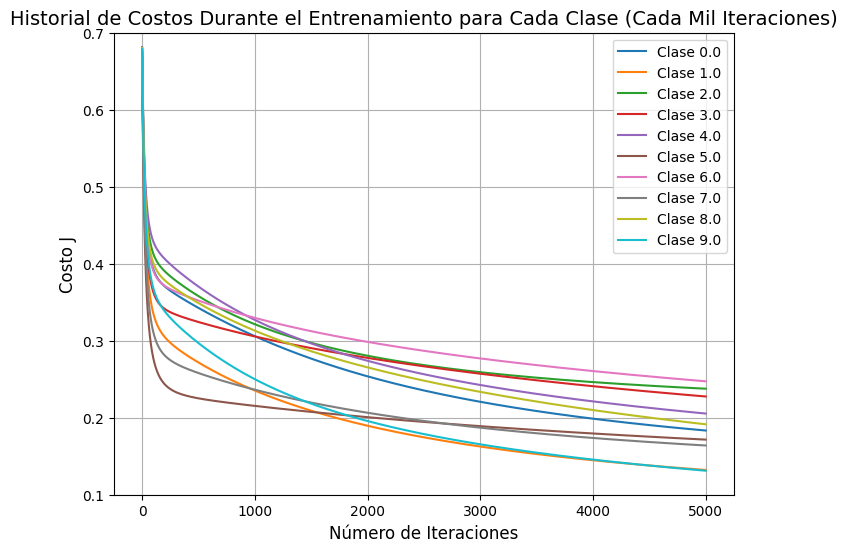

In [ ]:
# Graficar los costos para cada clase cada mil iteraciones
plt.figure(figsize=(8, 6))

for c in classes:
    iteraciones = range(0, num_iters)
    costos = [cost_histories[c][i] for i in iteraciones]
    plt.plot(iteraciones, costos, linestyle='-', label=f'Clase {c}')  # Usar marcadores para cada punto

plt.xlabel('Número de Iteraciones', fontsize=12)
plt.ylabel('Costo J', fontsize=12)
plt.title('Historial de Costos Durante el Entrenamiento para Cada Clase (Cada Mil Iteraciones)', fontsize=14)
plt.legend()
plt.grid(True)
plt.ylim(0.1, 0.7)  # Ajustar el límite del eje Y para una mejor visualización
plt.show()

#### 1. **Función `clasificar_binario(modelo, X)`**

Esta función utiliza el modelo entrenado para realizar predicciones binarias sobre un conjunto de datos `X`.

- **Parámetros:**
  - `modelo`: Los parámetros (`theta`) del modelo entrenado.
  - `X`: El conjunto de características de entrada para las predicciones.

- **Proceso:**
  1. Calcula la probabilidad de que cada ejemplo pertenezca a la clase utilizando la función sigmoide:
     ```python
     probabilidades = sigmoid(np.dot(X, modelo))
     ```
  2. Convierte estas probabilidades en una clasificación binaria:
     - Si la probabilidad es mayor o igual a 0.5, la clase es 1; de lo contrario, es 0.
     ```python
     return (probabilidades >= 0.5).astype(int)
     ```

#### 2. **Función `calcular_precision(y_true, y_pred)`**

Calcula la precisión del modelo comparando las predicciones del modelo (`y_pred`) con las etiquetas verdaderas (`y_true`).

- **Parámetros:**
  - `y_true`: Etiquetas verdaderas del conjunto de datos.
  - `y_pred`: Predicciones realizadas por el modelo.

- **Proceso:**
  - Calcula la precisión dividiendo el número de predicciones correctas por el número total de ejemplos:
    ```python
    precision = np.mean(y_pred == y_true) * 100
    ```

#### 3. **Bucle para Evaluación de Modelos**

Este bucle realiza predicciones y calcula métricas para cada modelo entrenado en un enfoque "One-vs-All" (Uno contra todos).

- **Proceso:**
  - Para cada clase `c` en `models.items()`:
    - Se imprimen los resultados del modelo para la clase `c`.
    - Se convierten las etiquetas del conjunto de entrenamiento (`y_train`) y del conjunto de prueba (`y_test`) en binarias, indicando si pertenecen a la clase `c` o no.
    - **Predicciones en el Conjunto de Entrenamiento:**
      - Se obtienen las predicciones binarias del modelo utilizando la función `clasificar_binario`.
      - Se


In [ ]:
# Función para realizar la clasificación binaria utilizando un modelo específico
def clasificar_binario(modelo, X):
    # Calcular la probabilidad de que cada ejemplo pertenezca a la clase del modelo
    probabilidades = sigmoid(np.dot(X, modelo))
    # Clasificar como 1 si la probabilidad es mayor o igual a 0.5, de lo contrario 0
    return (probabilidades >= 0.5).astype(int)

# Nueva función para calcular la precisión directamente
def calcular_precision(y_true, y_pred):
    # Calcular la precisión del modelo en clasificación multiclase
    precision = np.mean(y_pred == y_true) * 100
    return precision

# Realizar predicciones para cada modelo en el diccionario y calcular métricas para ambos conjuntos
for c, modelo in models.items():
    print(f"\nResultados para la clase {c}:")

    # Predicciones en el conjunto de entrenamiento
    y_train_binaria = (y_train == c).astype(int)
    y_pred_train_binaria = clasificar_binario(modelo, X_train)
    precision_train = calcular_precision(y_train_binaria, y_pred_train_binaria)

    # Predicciones en el conjunto de prueba
    y_test_binaria = (y_test == c).astype(int)
    y_pred_test_binaria = clasificar_binario(modelo, X_test)
    precision_test = calcular_precision(y_test_binaria, y_pred_test_binaria)

    # Imprimir los resultados de las métricas para el conjunto de entrenamiento
    print(f"\nConjunto de Entrenamiento:")
    print(f"Precisión: {precision_train:.2f}%")

    # Imprimir los resultados de las métricas para el conjunto de prueba
    print(f"\nConjunto de Prueba:")
    print(f"Precisión: {precision_test:.2f}%")



Resultados para la clase 0.0:

Conjunto de Entrenamiento:
Precisión: 95.03%

Conjunto de Prueba:
Precisión: 95.08%

Resultados para la clase 1.0:

Conjunto de Entrenamiento:
Precisión: 97.71%

Conjunto de Prueba:
Precisión: 97.58%

Resultados para la clase 2.0:

Conjunto de Entrenamiento:
Precisión: 90.59%

Conjunto de Prueba:
Precisión: 90.45%

Resultados para la clase 3.0:

Conjunto de Entrenamiento:
Precisión: 91.42%

Conjunto de Prueba:
Precisión: 91.47%

Resultados para la clase 4.0:

Conjunto de Entrenamiento:
Precisión: 92.19%

Conjunto de Prueba:
Precisión: 91.92%

Resultados para la clase 5.0:

Conjunto de Entrenamiento:
Precisión: 91.07%

Conjunto de Prueba:
Precisión: 91.10%

Resultados para la clase 6.0:

Conjunto de Entrenamiento:
Precisión: 91.11%

Conjunto de Prueba:
Precisión: 90.67%

Resultados para la clase 7.0:

Conjunto de Entrenamiento:
Precisión: 93.44%

Conjunto de Prueba:
Precisión: 92.90%

Resultados para la clase 8.0:

Conjunto de Entrenamiento:
Precisión: 93

### **Función `softmax**`

La función `softmax` se utiliza en problemas de clasificación multiclase. Transforma un vector de valores en un vector de probabilidades, donde cada valor representa la probabilidad de que una muestra pertenezca a una clase específica. El rango de salida de `softmax` es de 0 a 1, y la suma de todas las probabilidades es 1.

```z -= np.max(z, axis=1, keepdims=True ```
Esta línea resta el valor máximo de cada fila en la matriz z.

```exp_z = np.exp(z)```
Calcula la exponencial de cada valor en la matriz z. Transformar los valores de z para que todos sean positivos

```return exp_z / np.sum(exp_z, axis=1, keepdims=True)```
Divide cada exponencial por la suma de todas las exponenciales en la misma fila, normaliza las probabilidades, de modo que la suma de las probabilidades en cada fila sea igual a 1.

In [ ]:
def softmax(z):
    # Restar el máximo de z para evitar desbordamiento numérico
    z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### **Calcular Puntajes**
Se crea una matriz de ceros con dimensiones (n_samples, n_classes), donde n_samples es el número de ejemplos en X, y n_classes es el número de modelos binarios entrenados (una por clase). Esta matriz almacenará los puntajes calculados para cada ejemplo en X y cada modelo binario.

Se itera sobre los modelos binarios almacenados en el diccionario models. Para cada modelo binario, se calcula el puntaje lineal z mediante la multiplicación de X (características de entrada) por theta (pesos del modelo).

El puntaje z es una medida de cuán fuerte es la evidencia de que una muestra pertenece a una clase específica. Estos puntajes se utilizan en la función softmax para calcular las probabilidades de cada clase.

La función devuelve la matriz de puntajes calculados para cada ejemplo en X y para cada modelo binario, son la base para calcular las probabilidades de clase usando la función softmax.

In [ ]:
# Función para calcular los puntajes de cada modelo binario
def calcular_puntajes(models, X):
    # Inicializar una matriz para almacenar los puntajes
    puntajes = np.zeros((X.shape[0], len(models)))

    # Calcular los puntajes para cada modelo binario
    for i, (c, theta) in enumerate(models.items()):
        puntajes[:, i] = X.dot(theta)  # Calcular el puntaje lineal (z) para cada clase

    return puntajes

### **Calcular las Predicciones Finales Utilizando Softmax**

1. Calculo los puntajes para el conjunto de prueba pasandole el modelo y los datos de prueba

2. Aplico softmax a los puntajes para objtener probabilidades. Cada fila de la matriz resultante contiene las probabilidades de pertenencia de una muestra a cada una de las clases.

3. Seleccionar la Clase con la Mayor Probabilidad. ``np.argmax(probabilidades_test, axis=1)`` selecciona el índice de la clase con la mayor probabilidad para cada muestra. La suma de +1 ajusta los índices para que coincidan con las etiquetas de clase originales (asumiendo que empiezan en 1).

5. Imprimo las predicciones finales del modelo y calculo la precision del modelo. Comparo las predicciones finales y_pred_final con las etiquetas reales y_test y calculo la precisión del modelo como el porcentaje de predicciones correctas.

In [ ]:

# Calcular los puntajes para el conjunto de prueba
puntajes_test = calcular_puntajes(models, X_test)

# Aplicar softmax a los puntajes para obtener probabilidades
probabilidades_test = softmax(puntajes_test)

# Predicción final: seleccionar la clase con la mayor probabilidad
y_pred_final = np.argmax(probabilidades_test, axis=1)  # +1 para ajustar las clases al rango [1, 2, 3, ...]

# Imprimir las predicciones finales
print(f"Predicciones finales para el conjunto de prueba: {y_pred_final}")

# Calcular la precisión del modelo
precision = np.mean(y_pred_final == y_test) * 100
print(f"Precisión del modelo con Softmax en el conjunto de prueba: {precision:.2f}%")

Predicciones finales para el conjunto de prueba: [3 0 6 ... 6 8 7]
Precisión del modelo con Softmax en el conjunto de prueba: 79.57%


In [ ]:
# Seleccionar aleatoriamente 10 índices
random_indices = np.random.choice(len(y_test), size=20, replace=False)

# Imprimir los valores originales y predichos de esos índices aleatorios
print("Ejemplos aleatorios de predicciones y valores reales:")

for i in random_indices:
    print(f"Valor real: {int(y_test[i])}, Predicción: {int(y_pred_test[i])}")

Ejemplos aleatorios de predicciones y valores reales:
Valor real: 6, Predicción: 6
Valor real: 6, Predicción: 6
Valor real: 4, Predicción: 4
Valor real: 3, Predicción: 3
Valor real: 0, Predicción: 0
Valor real: 3, Predicción: 3
Valor real: 9, Predicción: 9
Valor real: 4, Predicción: 4
Valor real: 3, Predicción: 3
Valor real: 7, Predicción: 7
Valor real: 2, Predicción: 2
Valor real: 8, Predicción: 8
Valor real: 2, Predicción: 2
Valor real: 5, Predicción: 5
Valor real: 6, Predicción: 6
Valor real: 3, Predicción: 3
Valor real: 1, Predicción: 1
Valor real: 7, Predicción: 7
Valor real: 3, Predicción: 3
Valor real: 9, Predicción: 9


### **Matriz de confusion**

La mayor cantidad de aciertos se encuentra en la clase Compact, seguida de la clase Large.

La clase Midsize tiene un número considerable de errores, especialmente clasificándose como Compact y Large.

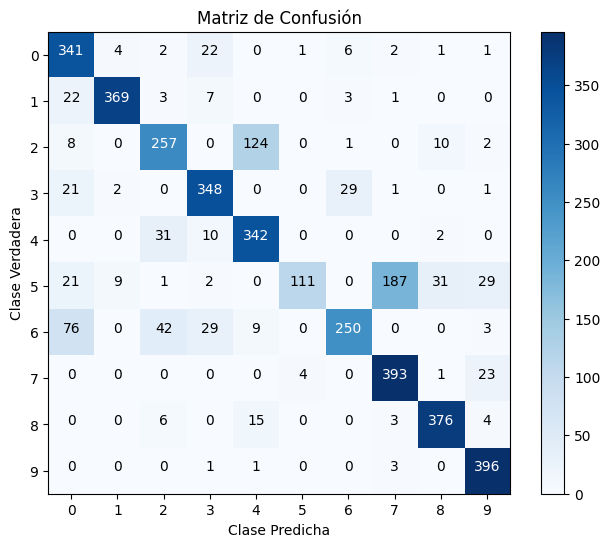

In [ ]:
# Función para calcular la matriz de confusión con control de errores
def calcular_matriz_confusion(y_true, y_pred, num_classes):
    matriz_confusion = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(y_true)):
        # Asegúrate de que los índices estén dentro del rango válido
        true_index = int(y_true[i])
        pred_index = int(y_pred[i])

        if true_index < num_classes and pred_index < num_classes:
            matriz_confusion[true_index, pred_index] += 1
        else:
            print(f"Advertencia: Índices fuera de rango encontrados - y_true: {true_index}, y_pred: {pred_index}")

    return matriz_confusion

# Determinar el número de clases en tu conjunto de datos
num_classes = len(np.unique(y_test))

# Calcular la matriz de confusión
matriz_confusion = calcular_matriz_confusion(y_test, y_pred_final, num_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')

# Mostrar los valores en la matriz de confusión
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(matriz_confusion[i, j]), horizontalalignment="center",
                 color="white" if matriz_confusion[i, j] > matriz_confusion.max() / 2 else "black")

plt.show()

# Análisis de Matriz de Confusión
La diagonal principal muestra valores donde el modelo clasificó correctamente las clases.
- **Clase 0 (T-shirt**): Se clasificaron correctamente 342 ejemplos
- **Clase 1 (Trouser)**: Se clasificaron correctamente 369 ejemplos
- **Clase 9 (Ankle boot)**: Se clasificaron correctamente 396 ejemplos.

**Errores de Clasificacion**

Las celdas fuera de la diagonal representan los errores de clasificacion.
- **Clase 2 (Pullover)** Se clasificaron erroneamente 123 ejemplos como **clase 4 (Coat)**
- **Clase 6 (Shirt)**: Se confundieron con la **clase 1 (Trouser)** en 188 ocasiones
- **Clase 5 (Sandal)**: Se clasificaron erróneamente como **clase 7 (sneaker)** 42 veces



# One vs All
Usa un clasificador multiclase utilizando regresion logistica regularizada. En este enfoque, el problema de clasificación multiclase se descompone en varios problemas de clasificación binaria (uno por cada clase), y cada uno de estos clasificadores es entrenado para distinguir una clase particular de todas las demás.

**1. Inicializacion de parámetros**
- `m` es un numero de ejemplos de entrenamiento y `n` es el numero de caracteristicas de cada ejemplos.
- `all_theta` es una matriz en la que cada fila contiene los parametros theta aprendidos para una clase. tiene tamanio `num_labels, n + 1` para almacenar los parametros de cada clasificador.
- Se agrega una columna de unos a `X` para el bias usando `np.concatenate`

**2. Almacenar el historial de costos**
- `all_cost_history` es una lista para almacenar los costos de cada clasificador a lo largo de las iteraciones.

**3. Bucle sobre cada clase**
- `for c un np.arange(num_labels)` recorre cada una de las clases de 0 a `num_labels - 1`. Se entrena un clasificador binario para cada clase.
- `initial_theta` inicializa parametros para cada clase a ceros.
- `options` define las opciones del optimizador, en este caso el numero maximo de iteraciones del optimizador de *Conjugate Gradient* es de 100

**4. Callback para registrar los costos**
- `callbackF` es una funcion que se ejecuta durante la optimizacion, su proposito es registrar el costo en cada iteracion del optimizador.
- `lrCostFunction` es la funcion de coste de regresion logistica regularizada que devuelve el costo del gradiente. el costo se guarda en `cost_history` para la clase actual.

**5. Minimizacion de la funcion de coste usando un optimizador**
```
res = optimize.minimize(lrCostFunction,
                        initial_theta,
                        (X, (y == c), lambda_),
                        jac=True,
                        method='CG',
                        options=options,
                        callback=callbackF)
```
- `optimize.minimize` es un metodo de optimizacion de `scipy` que utiliza el algoritmo de *Conjugate Gradiente* (`method = 'CG').
- Se minimiza la funcion de costo `lrCostFunction` con los datos X y las etiquetas (y == c), es decir que el vector de etiquetas binario donde la clase `c` se convierte en 1 y el resto de las clases 0.
- `jac=True` indica que la funcion `lrCostFunction` tambien devuelve el gradiente, lo cual es necesario para el optimizador.
- `callbackF = callbackF` asegura que el costo se registre en cada iteracion.

**6. Almacenar los parametros optimizados y el historial de costos**
- Después de que se ha entrenado el modelo para la clase c, los parámetros optimizados se guardan en `all_theta[c]`.
- Se guarda el historial de costos de este clasificador en `all_cost_history`

**7. Imprimir el costo final**
- Imprime el costo final para la clase c después de que el proceso de optimización ha terminado.

**8. Retornar resultados**
- La función retorna `all_theta`, que contiene los parámetros optimizados para cada clase, y `all_cost_history`, que contiene el historial de costos de cada clasificador.


In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))  # Inicializar matriz de parámetros
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar la columna de unos para el término de intercepción

    # Lista para almacenar los costos de cada clasificador
    all_cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)  # Inicializar los parámetros theta
        options = {'maxiter': 100}  # Configurar las opciones del optimizador

        # Lista temporal para almacenar los costos de este clasificador
        cost_history = []

        # Callback para registrar el costo en cada iteración
        def callbackF(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)

        # Ejecutar la minimización utilizando el optimizador de Conjugate Gradient
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callbackF)

        # Guardar los parámetros optimizados y el historial de costos
        all_theta[c] = res.x
        all_cost_history.append(cost_history)

        # Imprimir solo el costo final después de la optimización
        print(f'Costo final para la clase {c}: {cost_history[-1]}')

    return all_theta, all_cost_history

# Ejecucion del entrenamiento del modelo One vs All para regresion logistica

**1. Definir el numero de clases o etiquetas**
- `np.unique(y_train)`: Obtiene las clases únicas del conjunto de entrenamiento (y_train), que contienen las etiquetas de las diferentes categorías de las imágenes.
- `len(np.unique(y_train))`: Cuenta cuántas clases distintas hay. Por ejemplo, en el caso de Fashion MNIST, este valor debería ser 10, ya que hay 10 clases de ropa.

**2. Definir el parametro de regularizcion**
- `lambda_` es el parámetro de regularización que ayuda a prevenir el sobreajuste durante el entrenamiento. El valor de 0.01 es relativamente bajo, lo que significa que se aplica una pequeña penalización a los valores altos de los parámetros (theta). El objetivo de la regularización es reducir la complejidad del modelo y evitar que el modelo ajuste demasiado los datos de entrenamiento.

**3. Llamar a la funcion oneVsAll**
- `X_train`: Es la matriz de características del conjunto de entrenamiento. Contiene los valores de los píxeles de las imágenes.
- `y_train`: Son las etiquetas correspondientes al conjunto de entrenamiento. Indican la clase (0 a 9) de cada imagen.
- `num_labels`: Es el número de clases en el conjunto de datos (en este caso, 10 para Fashion MNIST).
- `lambda_`: Es el parámetro de regularización previamente definido.

**RESULTADO**
- `all_theta`: Es una matriz donde cada fila contiene los parámetros entrenados (theta) para cada clase en el esquema One-vs-All.
- `all_cost_history`: Es una lista de los historiales de costo para cada clase durante el entrenamiento, lo que permite ver cómo evolucionó el costo a lo largo de las iteraciones para cada clase.









In [ ]:
# Seleccionar aleatoriamente 10 índices
random_indices = np.random.choice(len(y_test), size=20, replace=False)

# Imprimir los valores originales y predichos de esos índices aleatorios
print("Ejemplos aleatorios de predicciones y valores reales:")

for i in random_indices:
    print(f"Valor real: {int(y_test[i])}, Predicción: {int(y_pred_test[i])}")

Ejemplos aleatorios de predicciones y valores reales:
Valor real: 2, Predicción: 2
Valor real: 7, Predicción: 7
Valor real: 9, Predicción: 9
Valor real: 4, Predicción: 4
Valor real: 0, Predicción: 5
Valor real: 1, Predicción: 1
Valor real: 6, Predicción: 6
Valor real: 1, Predicción: 1
Valor real: 0, Predicción: 0
Valor real: 6, Predicción: 6
Valor real: 6, Predicción: 6
Valor real: 4, Predicción: 4
Valor real: 9, Predicción: 9
Valor real: 7, Predicción: 7
Valor real: 0, Predicción: 0
Valor real: 7, Predicción: 5
Valor real: 1, Predicción: 1
Valor real: 8, Predicción: 8
Valor real: 0, Predicción: 0
Valor real: 3, Predicción: 3


# Realizar predicciones en un conjunto de datos predictOneVsAll
**1. Tomar argumentos**
- `all_theta`: Es la matriz de parámetros entrenados (theta) para cada clase. Cada fila de all_theta corresponde a los parámetros para una clase diferente.
- `X`: Es la matriz de características (datos de entrada) en la que queremos hacer predicciones.
**2. Calcular numero de ejemplos y calcular cuantas clases hay**
- `m`: Calcula el número de ejemplos (filas) en el conjunto de datos X.
- `num_labels`: Calcula cuántas clases hay (es decir, el número de filas en all_theta), lo que coincide con el número de etiquetas en el conjunto de datos.
- `p`: Es un vector de ceros con longitud igual a m, que almacenará las predicciones de clase para cada ejemplo.

**3. Concatenar columna de unos para el bias**
- Se agrega una columna de unos a la matriz X para representar el término de sesgo (bias), necesario para el cálculo del modelo. Esto asegura que el cálculo de la hipótesis tenga el término constante de bias (theta_0).

**4. Encontrar la clase con mayor probabilidad para cada fila**
- `X.dot(all_theta.T)`: Multiplica la matriz de características X (con el término de bias) por la transpuesta de la matriz all_theta. Esto genera una *matriz* donde cada fila contiene los puntajes (z) para cada clase.
- `sigmoid(X.dot(all_theta.T))`: Aplica la función sigmoide a los puntajes (z) para convertirlos en probabilidades. La función sigmoide transforma los puntajes en un rango entre 0 y 1.
- `np.argmax(..., axis=1)`: Encuentra el índice de la clase con la mayor probabilidad para cada fila (cada ejemplo), es decir, la clase más probable para cada ejemplo. El índice de la clase con la probabilidad más alta será la predicción para ese ejemplo.

**5. Devolver p**
- `p`: Devuelve el vector de predicciones de clase. Cada valor en p es la clase predicha (entre 0 y num_labels - 1) para cada ejemplo en X.











In [ ]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

# Realizar predicciones
```
y_pred_train = predictOneVsAll(all_theta, X_train):
```
- `all_theta`: Matriz que contiene los parámetros optimizados para cada clase, obtenidos del proceso de entrenamiento One-vs-All.
- `X_train`: Conjunto de datos de entrenamiento que contiene las características de cada ejemplo, sin incluir las etiquetas.
- Esta línea utiliza la función `predictOneVsAll` para hacer predicciones sobre el conjunto de entrenamiento (X_train). El resultado, `y_pred_train`, es un arreglo que contiene las clases predichas para cada ejemplo en X_train.

```
y_pred_test = predictOneVsAll(all_theta, X_test)
```
- `X_test`: Conjunto de datos de prueba que, al igual que X_train, contiene sólo las características de cada ejemplo.
- Similarmente, esta línea aplica la función `predictOneVsAll` para hacer predicciones sobre el conjunto de prueba (X_test). El resultado, `y_pred_test`, es un arreglo que contiene las clases predichas para cada ejemplo en X_test.







In [ ]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_pred_train = predictOneVsAll(all_theta, X_train)
y_pred_test = predictOneVsAll(all_theta, X_test)

# Calcular presicion
Esta función se encarga de calcular la precisión de un modelo de clasificación, que mide el porcentaje de predicciones correctas hechas por el modelo en relación con el total de predicciones.

**1. Parametros de entrada**
- `y_true`: Un arreglo o vector que contiene las etiquetas verdaderas de los datos. Estas son las clases reales o correctas.
- `y_pred`: Un arreglo o vector que contiene las etiquetas predichas por el modelo. Estas son las clases que el modelo ha asignado a cada observación.

**2. Calculo de precision**
- La comparación `y_true == y_pred` produce un arreglo booleano, donde los valores son True si la predicción fue correcta y False si no lo fue.
- `np.mean(y_true == y_pred)`: Toma el promedio de los valores booleanos. Como True se interpreta como 1 y False como 0, el promedio de estos valores corresponde a la proporción de predicciones correctas.
- `* 100`: Multiplica el resultado por 100 para convertirlo en porcentaje.






In [ ]:
# Función para calcular la precisión
def calcular_precision(y_true, y_pred):
    """
    Calcula la precisión del modelo.

    Parámetros:
    y_true : ndarray
        Vector de etiquetas verdaderas.
    y_pred : ndarray
        Vector de etiquetas predichas por el modelo.

    Retorna:
    precision : float
        Precisión del modelo en porcentaje.
    """
    precision = np.mean(y_true == y_pred) * 100  # Calcula la precisión como el porcentaje de predicciones correctas
    return precision

Este bloque de código se encarga de calcular la precisión del modelo tanto en el conjunto de entrenamiento como en el conjunto de prueba, utilizando la función `calcular_precision`.

In [ ]:
# Calcular la precisión para el conjunto de entrenamiento y prueba
precision_train = calcular_precision(y_train, y_pred_train)
precision_test = calcular_precision(y_test, y_pred_test)

print(f"Precisión del modelo en el conjunto de entrenamiento: {precision_train:.2f}%")
print(f"Precisión del modelo en el conjunto de prueba: {precision_test:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 98.94%
Precisión del modelo en el conjunto de prueba: 96.53%


In [ ]:
# Imprimir los valores originales y predichos
print("Ejemplos de predicciones y valores reales:")

for i in range(10):  # Cambia el número si quieres más o menos ejemplos
    print(f"Valor real: {int(y_test[i])}, Predicción: {int(y_pred_test[i])}")


Ejemplos de predicciones y valores reales:
Valor real: 3, Predicción: 3
Valor real: 6, Predicción: 6
Valor real: 0, Predicción: 0
Valor real: 6, Predicción: 6
Valor real: 6, Predicción: 6
Valor real: 2, Predicción: 2
Valor real: 3, Predicción: 3
Valor real: 1, Predicción: 1
Valor real: 6, Predicción: 6
Valor real: 0, Predicción: 0


**Precisión en el conjunto de entrenamiento: 98.81%**
- Esto significa que el modelo ha aprendido muy bien los ejemplos del conjunto de entrenamiento y puede predecir correctamente casi todas las etiquetas en esos datos.

**Precisión en el conjunto de prueba: 96.40%**
- La precisión en el conjunto de prueba sigue siendo muy alta, lo que indica que el modelo ha generalizado bien a ejemplos no vistos. Esta es una buena señal de que no hay sobreajuste significativo (overfitting), ya que el rendimiento en los datos de prueba no cae drásticamente.

*El modelo ha sido entrenado correctamente y está funcionando bien tanto en los datos de entrenamiento como en los de prueba.*




# Grafica de costo de entrenamiento One vs All
El costo disminuye rápidamente en las primeras iteraciones para todas las clases. Este comportamiento es esperado, ya que al inicio del entrenamiento, el modelo ajusta rápidamente los parámetros para acercarse a un óptimo.

Después de las primeras 20-30 iteraciones, la tasa de disminución del costo se ralentiza, lo que indica que el modelo está convergiendo lentamente hacia una solución óptima para cada clase.

- Las clases tienen diferentes trayectorias de costo. Algunas clases, como la **Clase 4 (línea verde)**, tienen un costo que disminuye más lentamente en comparación con otras, lo que puede indicar que esa clase es más difícil de separar o que el modelo tiene más dificultades para ajustarse bien a esa clase.

- Otras clases, como la **Clase 1 (línea azul)** o la **Clase 9 (línea naranja)**, logran un costo cercano a cero más rápido, lo que sugiere que el modelo encuentra menos dificultades para clasificar correctamente esos ejemplos.



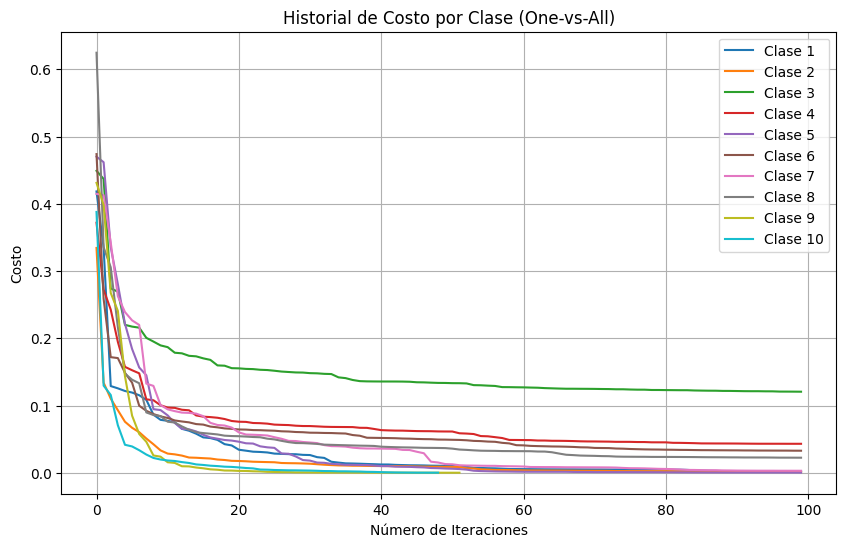

In [ ]:
def graficar_costo(all_cost_history, num_labels):
    """
    Grafica el costo de entrenamiento para cada clase en el modelo One-vs-All.

    Parámetros:
    all_cost_history : list
        Lista de listas, donde cada sublista contiene el historial de costos para un clasificador.
    num_labels : int
        Número de etiquetas o clases en el dataset.
    """
    plt.figure(figsize=(10, 6))

    # Graficar el costo para cada clase
    for c in range(num_labels):
        iteraciones = range(len(all_cost_history[c]))  # Obtener la cantidad de iteraciones para la clase c
        plt.plot(iteraciones, all_cost_history[c], label=f'Clase {c+1}')

    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Costo')
    plt.title('Historial de Costo por Clase (One-vs-All)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar el costo
graficar_costo(all_cost_history, num_labels)

# Conclusiones Finales
La precisión obtenida al aplicar Softmax es significativamente más baja que la obtenida con el modelo One-vs-All (96.40% frente a 79.75%).

### One vs All
 Este método entrena un clasificador binario por cada clase. Cada clasificador trata de distinguir entre una clase y el resto. Al final, la clase con la mayor puntuación entre los clasificadores binarios es seleccionada como la predicción. Este enfoque suele ser muy efectivo cuando hay un claro margen entre las clases.

### Softmax
El Softmax transforma los puntajes de los clasificadores en probabilidades, lo que puede suavizar las predicciones y dar más peso a las clases que tengan valores cercanos, lo cual podría ser un factor si algunas clases son más difíciles de separar.

**Distribucion de clases**

*Softmax* puede ser más sensible a desequilibrios en la distribución de clases o a ejemplos ambiguos que pueden "confundir" al modelo, provocando una menor precisión.

**Decisiones de frontera**

*One-vs-All* hace clasificaciones más tajantes en cuanto a las fronteras de decisión, mientras que Softmax puede tener más suavidad en la separación de las clases debido a la naturaleza probabilística de su salida.

